In [1]:
%pip install keras

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import seaborn as sns

In [3]:
model = tf.keras.models.load_model("trained_model.keras")

In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,528,288 (89.75 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,685,526 (59.84 MB)

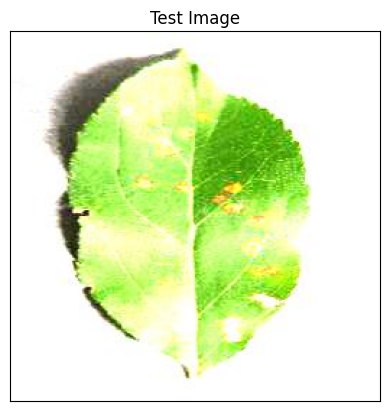

In [6]:
import matplotlib.pyplot as plt
#Test Image Visualization
import cv2
image_path = 'test/test/AppleCedarRust1.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

# Testing Model

In [7]:
# preprocessing image
"""
The model cannot directly read image unless it is preprocessed to a readaable format.
The image should be resized to the same size as the training images.
"""

image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
# Convert single image to a batch like how the pthers had 32 batches
input_arr = np.array([input_arr])  
print(input_arr.shape)

(1, 128, 128, 3)


In [8]:
prediction = model.predict(input_arr)
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


array([[3.8830498e-15, 1.5790228e-15, 1.0000000e+00, 1.4600161e-17,
        5.5197266e-15, 3.3429929e-13, 5.0118584e-19, 5.9819138e-18,
        2.3322367e-24, 3.3860596e-20, 4.1854282e-25, 1.2584266e-15,
        3.5367468e-21, 7.2102129e-22, 2.4375821e-15, 1.7430093e-14,
        6.0095002e-17, 4.8752425e-18, 4.7343271e-16, 1.6827160e-14,
        6.2481497e-18, 1.1836530e-16, 1.8249936e-14, 6.2831989e-15,
        5.2115279e-19, 1.0741441e-18, 9.9351174e-19, 1.6903513e-16,
        1.1682823e-12, 6.5177332e-16, 8.6066442e-15, 1.7495082e-21,
        1.8726853e-14, 1.6599775e-18, 4.2783407e-12, 4.3401583e-15,
        8.9127924e-17, 5.7836945e-16]], dtype=float32)

In [9]:
prediction, prediction.shape

(array([[3.8830498e-15, 1.5790228e-15, 1.0000000e+00, 1.4600161e-17,
         5.5197266e-15, 3.3429929e-13, 5.0118584e-19, 5.9819138e-18,
         2.3322367e-24, 3.3860596e-20, 4.1854282e-25, 1.2584266e-15,
         3.5367468e-21, 7.2102129e-22, 2.4375821e-15, 1.7430093e-14,
         6.0095002e-17, 4.8752425e-18, 4.7343271e-16, 1.6827160e-14,
         6.2481497e-18, 1.1836530e-16, 1.8249936e-14, 6.2831989e-15,
         5.2115279e-19, 1.0741441e-18, 9.9351174e-19, 1.6903513e-16,
         1.1682823e-12, 6.5177332e-16, 8.6066442e-15, 1.7495082e-21,
         1.8726853e-14, 1.6599775e-18, 4.2783407e-12, 4.3401583e-15,
         8.9127924e-17, 5.7836945e-16]], dtype=float32),
 (1, 38))

# Interpretation of Prediction

The results above gives the probability of the leaf in the above image belongs to each of the 38 classes the model was trained on.. Now let's find the index of the maximum probability.

In [10]:
result_index = np.argmax(prediction) 
result_index

2

In [11]:
# finding the exact names in the classes
# this will be hardcoded since the training notebook is not imported here
class_name = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']

In [12]:
# displaying results of disease prediction
model_prediction = class_name[result_index]
print(f" this leaf is an idicator of {model_prediction}")

 this leaf is an idicator of Apple___Cedar_apple_rust


In [13]:
%pip install streamlit


Note: you may need to restart the kernel to use updated packages.
